In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'   # better inline figure resolution

from utils import load_results, show_and_save_results

In [2]:
this_notebook = "result_summary"
probe_names = ["SimpleMLPProbe", "TTPD", "LRProbe", "MMProbe", "CCSProbe",]
probe_names_short = ['MLP', 'TTPD', 'LR', 'MM', 'CCS']

notebook_name = "lie_detection"
experiment_names = [
    "unseen_topics",
    "logical_junctions",
    "german",
    "overall_generalization",
    "real_world_lies"
]

In [3]:
model_name = "Llama3_8B_chat"
experiment_accuracies = {}
for experiment_name in experiment_names:
    # Load saved results
    probe_accuracies, dataset_accuracies, meta_info = load_results(notebook_name, experiment_name, model_name)   # load the results from the .json file
    experiment_accuracies[experiment_name] = probe_accuracies

In [4]:
# create a grid of accuracies for each probe and experiment
make_grid = lambda type : np.array([
    [experiment_accuracies[experiment][probe][type]
        for experiment in experiment_names
    ]
    for probe in probe_names
])
result_grid = make_grid('mean')
result_grid_std = make_grid('std_dev')

# insert the overall accuracy for each probe at the top of the grid
overall_means = np.mean(result_grid, axis=1)
overall_stds  = np.std(result_grid, axis=1)
result_grid = np.concatenate((overall_means[:, None], result_grid), axis=1)
result_grid_std = np.concatenate((overall_stds[:, None], result_grid_std), axis=1)

# mark the best probe for each experiment
best_probes = np.argmax(result_grid, axis=0)

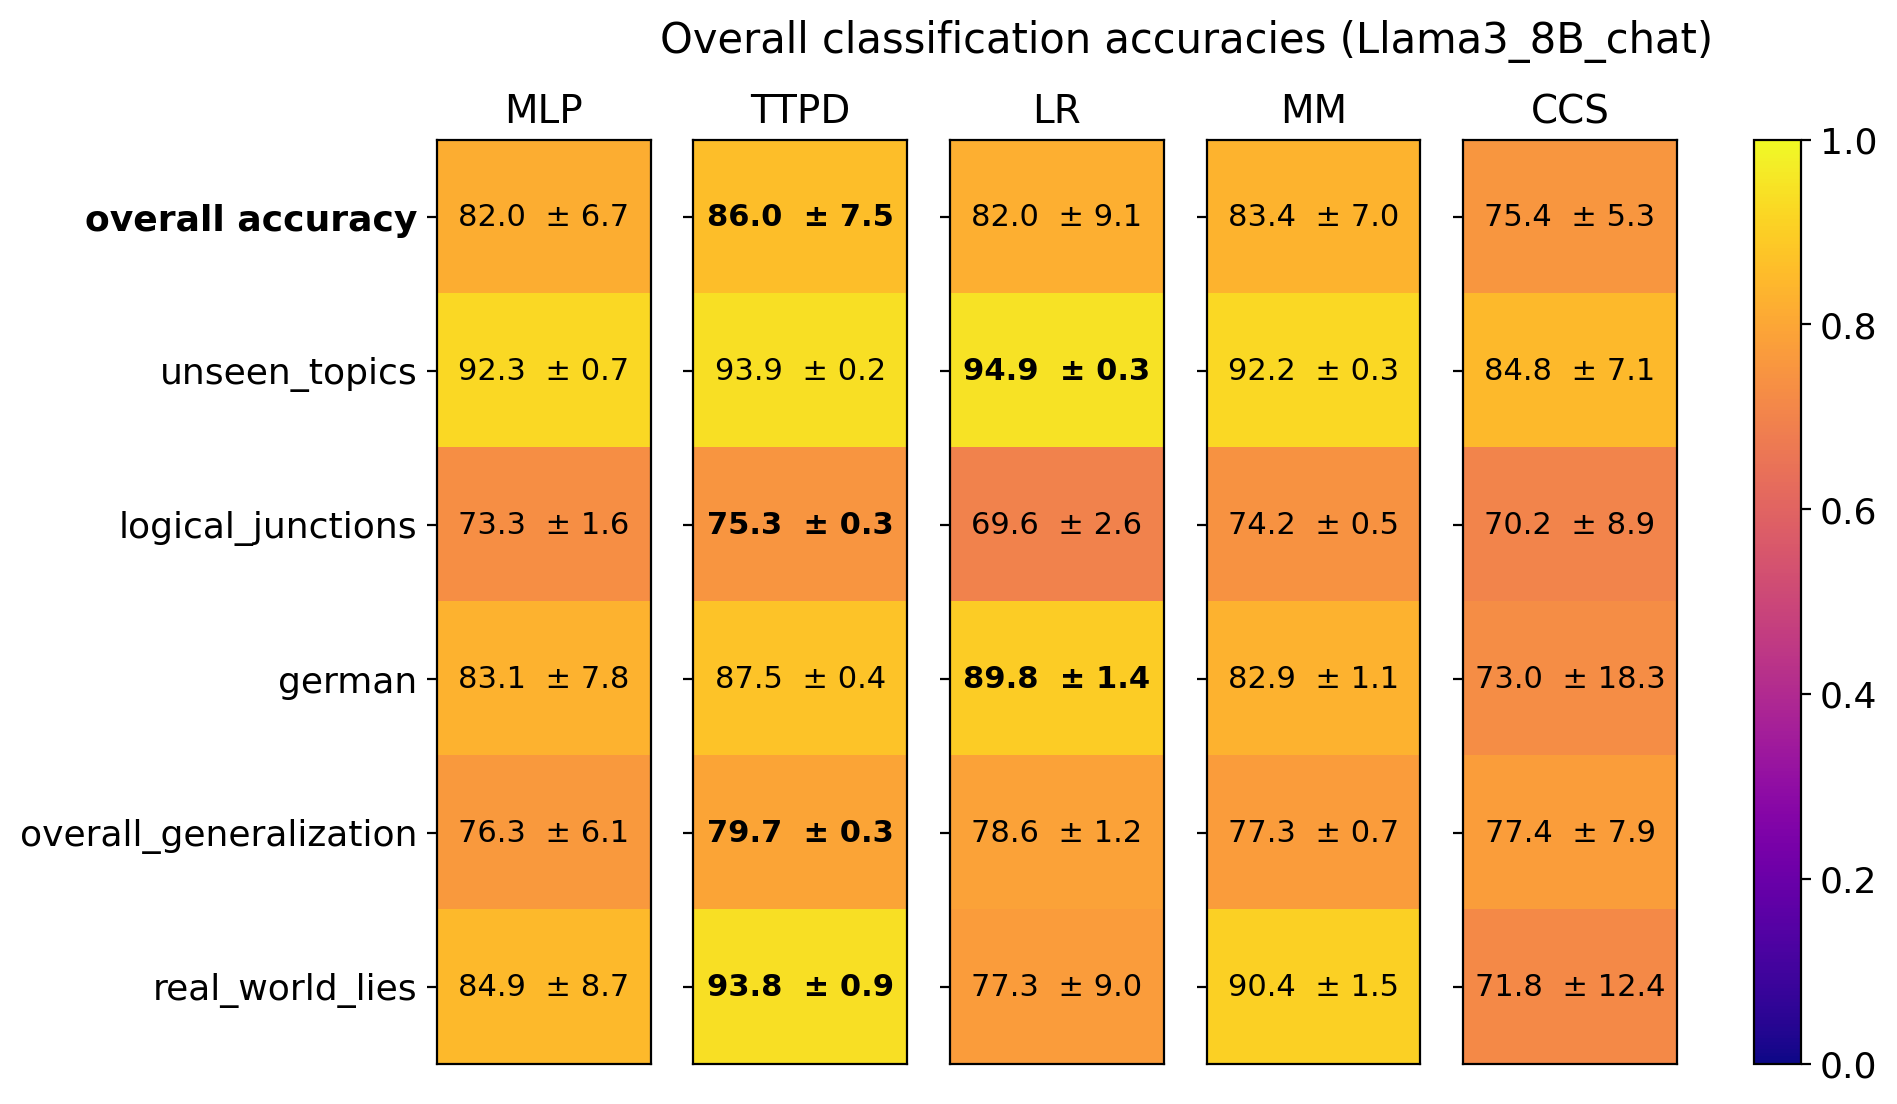

In [5]:
# plot the results

fig, axes = plt.subplots(figsize=(10, 6), ncols=len(probe_names))
fig.suptitle(f"Overall classification accuracies ({model_name})", fontsize=15)

for t, (ax, probe) in enumerate(zip(axes, probe_names)):
    # draw the grid (color map of mean accuracies)
    im = ax.imshow(result_grid[t].reshape((-1, 1)), vmin=0, vmax=1, cmap='plasma', aspect='auto')
    
    # annotate it with mean and std
    for row_idx in range(len(result_grid[t])):
        val = result_grid[t][row_idx]
        std = result_grid_std[t][row_idx]
        text = f"{val*100:3.1f}  ± {std*100:3.1f}"
        if val == result_grid[best_probes[row_idx]][row_idx]:
            weight = 'bold'
        else:
            weight = 'normal'
        ax.text(0, row_idx, text, ha='center', va='center', fontsize=11, fontweight=weight)
    
    # ticks and titles
    ax.set_title(probe_names_short[t], fontsize=14)
    ax.set_xticks([])
    ax.set_yticks(range(len(result_grid[t])))
    ax.set_yticklabels([])

# label the y‐axis on the first column only
yticks = ["overall accuracy"] + experiment_names
axes[0].set_yticklabels(yticks, fontsize=13)
for label in axes[0].get_yticklabels():
    if label.get_text() == "overall accuracy":
        label.set_fontweight("bold")
    else:
        label.set_fontweight("normal")

# colorbar
cbar = fig.colorbar(im, ax=axes)
cbar.ax.tick_params(labelsize=13)

# save the figure
plt.savefig(f"./results/{this_notebook}--{notebook_name}--{model_name}.svg", bbox_inches = "tight")

In [6]:
model_name = "Gemma2_9B_base"
experiment_accuracies = {}
for experiment_name in experiment_names:
    # Load saved results
    probe_accuracies, dataset_accuracies, meta_info = load_results(notebook_name, experiment_name, model_name)   # load the results from the .json file
    experiment_accuracies[experiment_name] = probe_accuracies

In [7]:
# create a grid of accuracies for each probe and experiment
make_grid = lambda type : np.array([
    [experiment_accuracies[experiment][probe][type]
        for experiment in experiment_names
    ]
    for probe in probe_names
])
result_grid = make_grid('mean')
result_grid_std = make_grid('std_dev')

# insert the overall accuracy for each probe at the top of the grid
overall_means = np.mean(result_grid, axis=1)
overall_stds  = np.std(result_grid, axis=1)
result_grid = np.concatenate((overall_means[:, None], result_grid), axis=1)
result_grid_std = np.concatenate((overall_stds[:, None], result_grid_std), axis=1)

# mark the best probe for each experiment
best_probes = np.argmax(result_grid, axis=0)

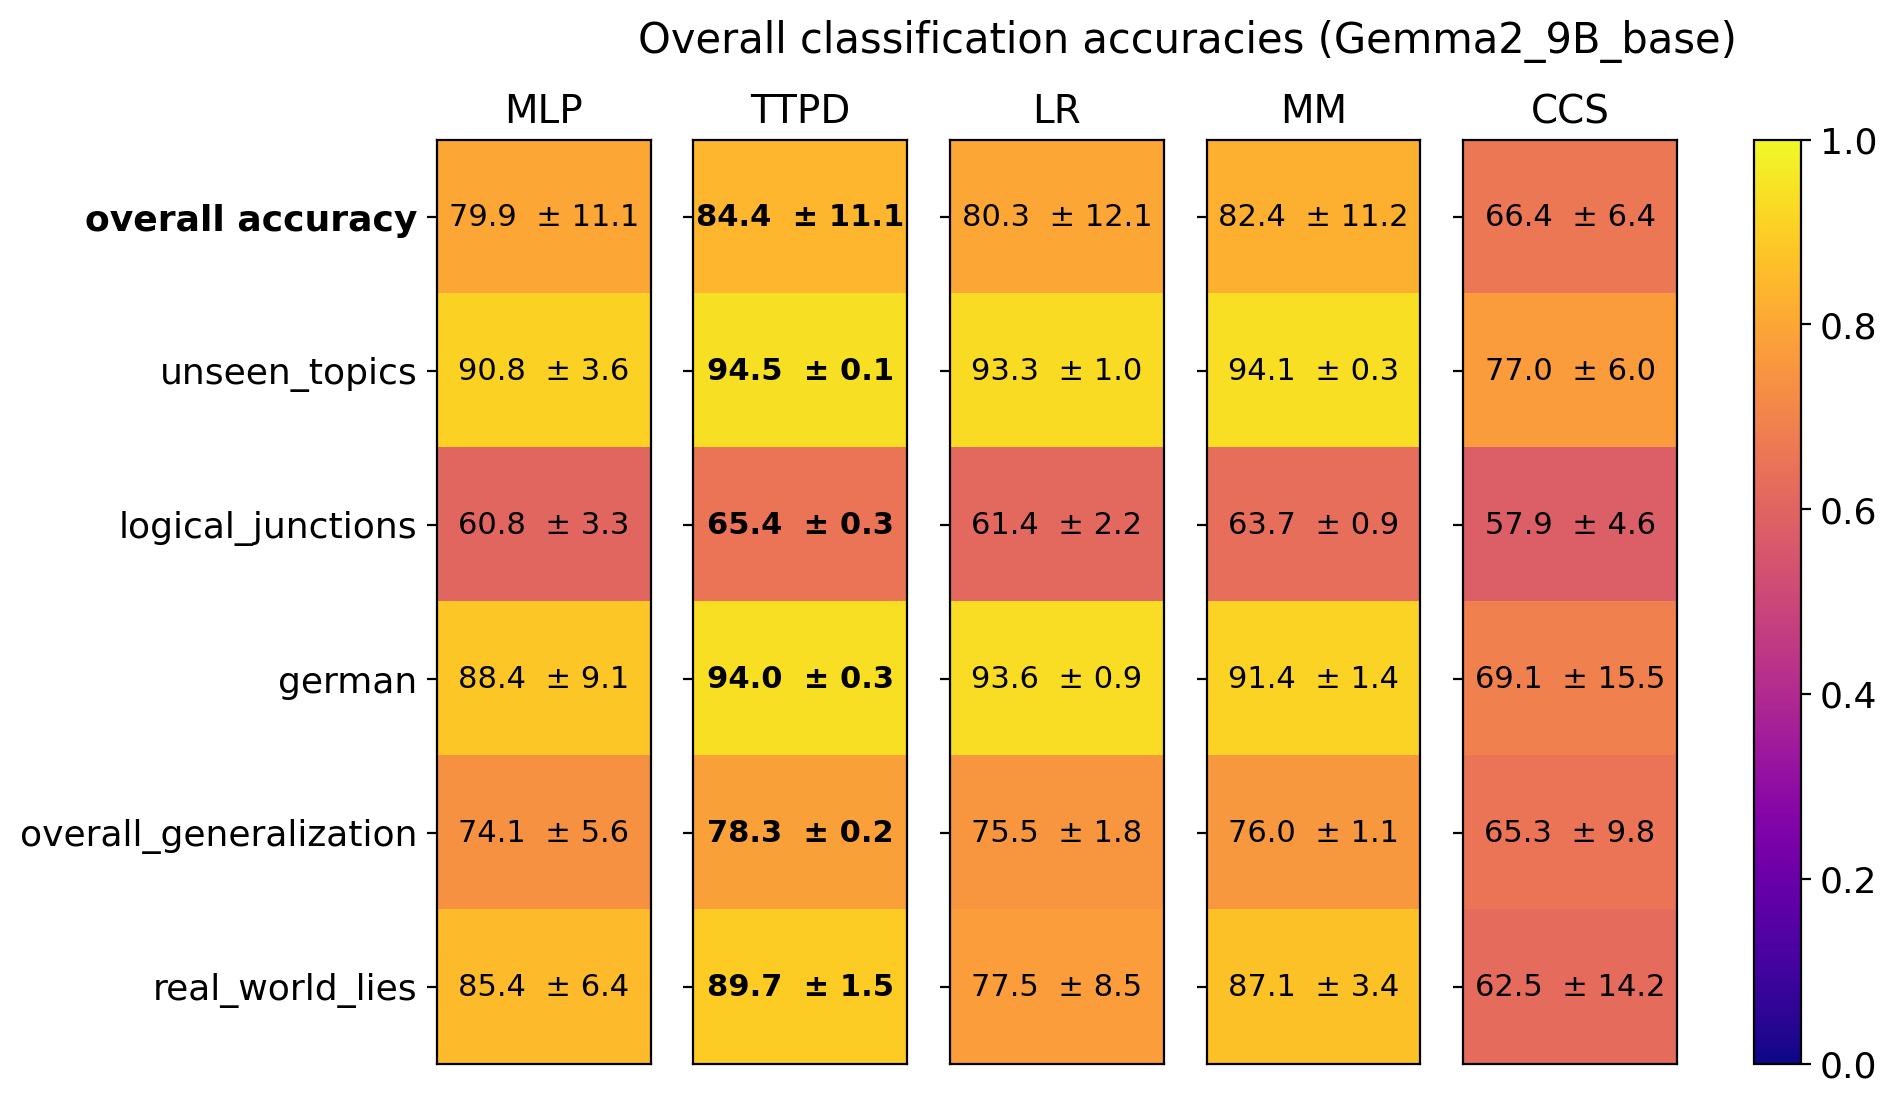

In [8]:
# plot the results

fig, axes = plt.subplots(figsize=(10, 6), ncols=len(probe_names))
fig.suptitle(f"Overall classification accuracies ({model_name})", fontsize=15)

for t, (ax, probe) in enumerate(zip(axes, probe_names)):
    # draw the grid (color map of mean accuracies)
    im = ax.imshow(result_grid[t].reshape((-1, 1)), vmin=0, vmax=1, cmap='plasma', aspect='auto')
    
    # annotate it with mean and std
    for row_idx in range(len(result_grid[t])):
        val = result_grid[t][row_idx]
        std = result_grid_std[t][row_idx]
        text = f"{val*100:3.1f}  ± {std*100:3.1f}"
        if val == result_grid[best_probes[row_idx]][row_idx]:
            weight = 'bold'
        else:
            weight = 'normal'
        ax.text(0, row_idx, text, ha='center', va='center', fontsize=11, fontweight=weight)
    
    # ticks and titles
    ax.set_title(probe_names_short[t], fontsize=14)
    ax.set_xticks([])
    ax.set_yticks(range(len(result_grid[t])))
    ax.set_yticklabels([])

# label the y‐axis on the first column only
yticks = ["overall accuracy"] + experiment_names
axes[0].set_yticklabels(yticks, fontsize=13)
for label in axes[0].get_yticklabels():
    if label.get_text() == "overall accuracy":
        label.set_fontweight("bold")
    else:
        label.set_fontweight("normal")

# colorbar
cbar = fig.colorbar(im, ax=axes)
cbar.ax.tick_params(labelsize=13)

# save the figure
plt.savefig(f"./results/{this_notebook}--{notebook_name}--{model_name}.svg", bbox_inches = "tight")

In [9]:
# load the summary results for one model
model_name = "Mistral_7B_chat"
experiment_accuracies = {}
for experiment_name in experiment_names:
    # Load saved results
    probe_accuracies, dataset_accuracies, meta_info = load_results(notebook_name, experiment_name, model_name)   # load the results from the .json file
    experiment_accuracies[experiment_name] = probe_accuracies

In [10]:
# create a grid of accuracies for each probe and experiment
make_grid = lambda type : np.array([
    [experiment_accuracies[experiment][probe][type]
        for experiment in experiment_names
    ]
    for probe in probe_names
])
result_grid = make_grid('mean')
result_grid_std = make_grid('std_dev')

# insert the overall accuracy for each probe at the top of the grid
overall_means = np.mean(result_grid, axis=1)
overall_stds  = np.std(result_grid, axis=1)
result_grid = np.concatenate((overall_means[:, None], result_grid), axis=1)
result_grid_std = np.concatenate((overall_stds[:, None], result_grid_std), axis=1)

# mark the best probe for each experiment
best_probes = np.argmax(result_grid, axis=0)

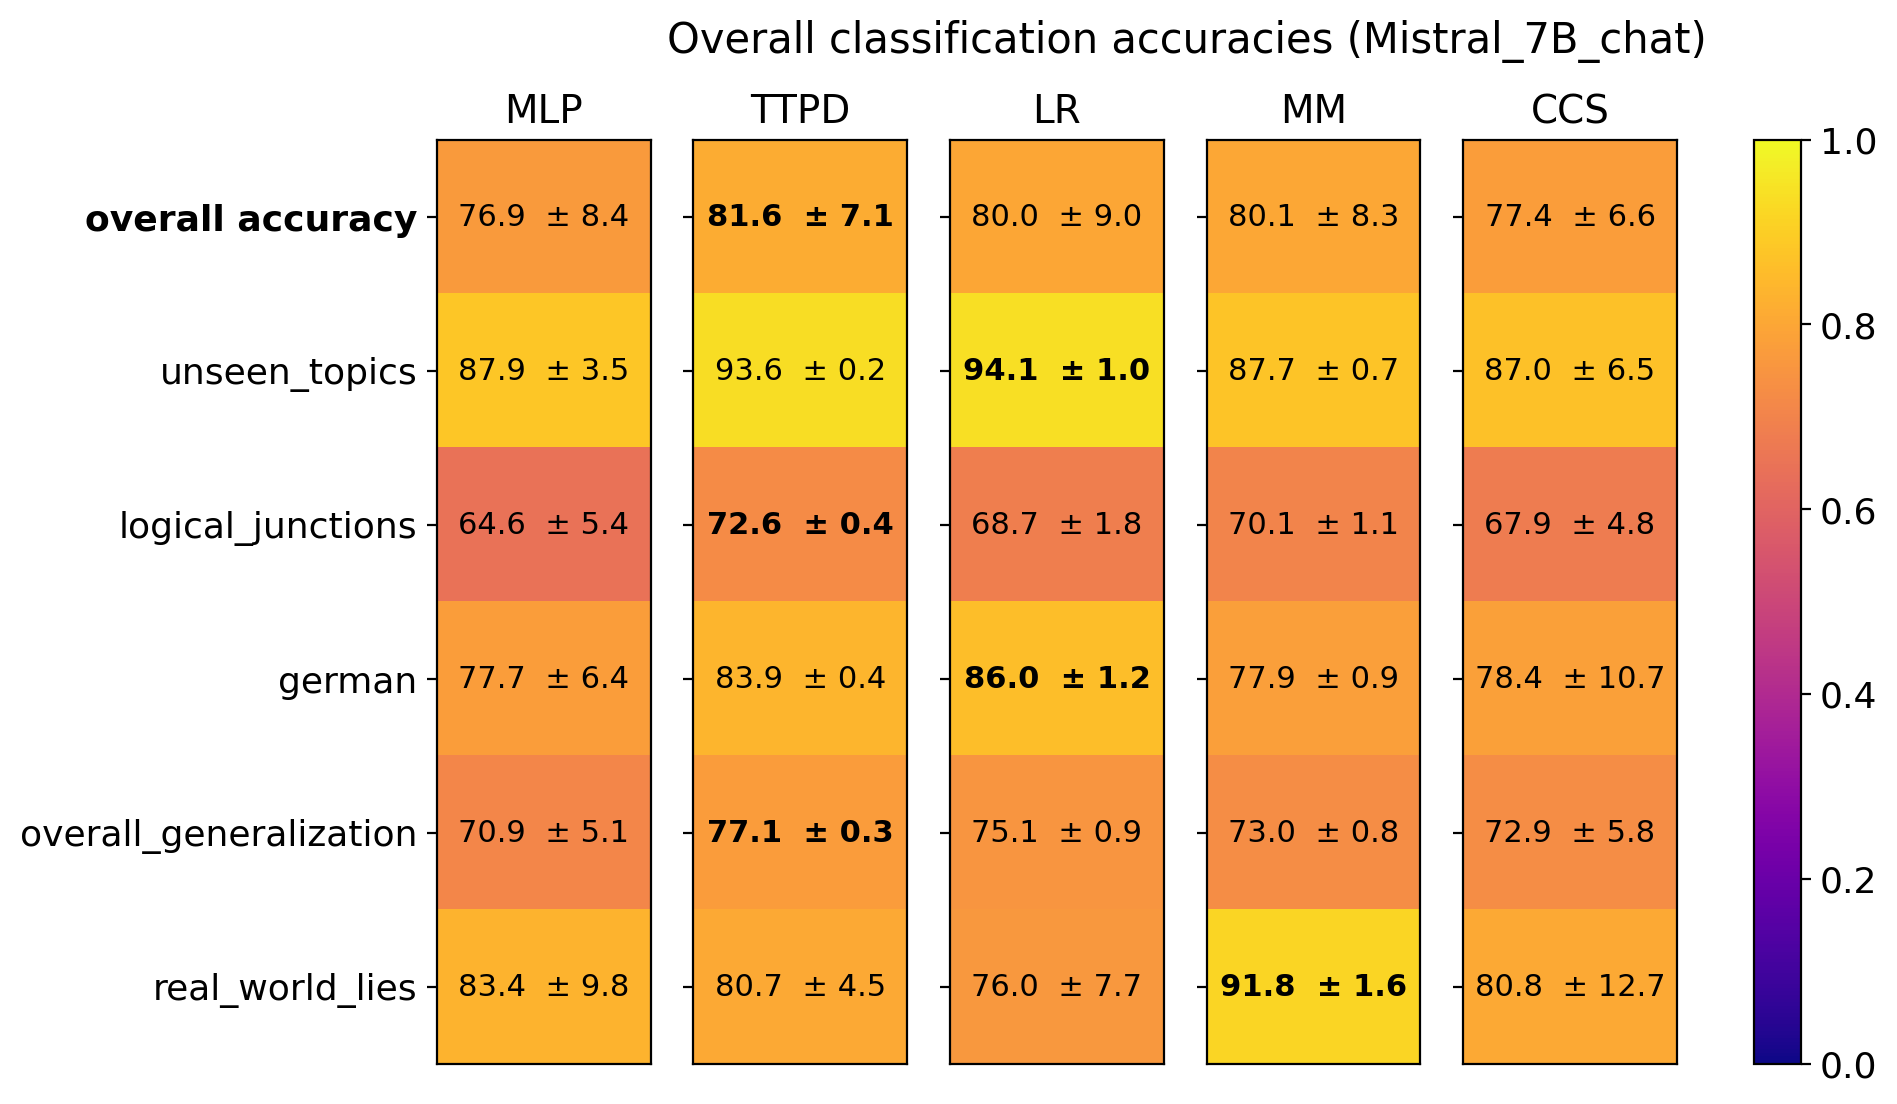

In [11]:
# plot the results

fig, axes = plt.subplots(figsize=(10, 6), ncols=len(probe_names))
fig.suptitle(f"Overall classification accuracies ({model_name})", fontsize=15)

for t, (ax, probe) in enumerate(zip(axes, probe_names)):
    # draw the grid (color map of mean accuracies)
    im = ax.imshow(result_grid[t].reshape((-1, 1)), vmin=0, vmax=1, cmap='plasma', aspect='auto')
    
    # annotate it with mean and std
    for row_idx in range(len(result_grid[t])):
        val = result_grid[t][row_idx]
        std = result_grid_std[t][row_idx]
        text = f"{val*100:3.1f}  ± {std*100:3.1f}"
        if val == result_grid[best_probes[row_idx]][row_idx]:
            weight = 'bold'
        else:
            weight = 'normal'
        ax.text(0, row_idx, text, ha='center', va='center', fontsize=11, fontweight=weight)
    
    # ticks and titles
    ax.set_title(probe_names_short[t], fontsize=14)
    ax.set_xticks([])
    ax.set_yticks(range(len(result_grid[t])))
    ax.set_yticklabels([])

# label the y‐axis on the first column only
yticks = ["overall accuracy"] + experiment_names
axes[0].set_yticklabels(yticks, fontsize=13)
for label in axes[0].get_yticklabels():
    if label.get_text() == "overall accuracy":
        label.set_fontweight("bold")
    else:
        label.set_fontweight("normal")

# colorbar
cbar = fig.colorbar(im, ax=axes)
cbar.ax.tick_params(labelsize=13)

# save the figure
plt.savefig(f"./results/{this_notebook}--{notebook_name}--{model_name}.svg", bbox_inches = "tight")